# CSC421 Assignment 3 - Part I  Simulation and Probabilities (5 points) #
### Author: George Tzanetakis 

This notebook is based on the supporting material for topics covered in **Chapter 13 Quantifying Uncertainty** from the book *Artificial Intelligence: A Modern Approach.* This part does NOT rely on the provided code so you can complete it just using basic Python. 

```
Misunderstanding of probability may be the greatest of all impediments
to scientific literacy.

Gould, Stephen Jay
```

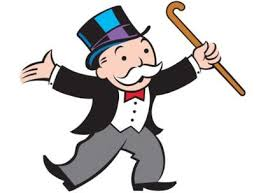


# Introduction - Simulation for approximate estimation of probabilities 

In this assignment your task is to incrementally create a simulation for the board game Monopoly
https://en.wikipedia.org/wiki/Monopoly_(game). Very interesting origin story for the game: 
https://www.saturdayeveningpost.com/2017/09/really-invented-monopoly/


**NOTE THAT THE GRADING IN THIS ASSIGNMENT IS DIFFERENT FOR GRADUATE STUDENTS AND THEY HAVE TO DO EXTRA WORK FOR FULL MARKS**

Consider simulating a game of Monopoly. Your goal is to experimentally determine the cummulative probability of landing on each square following the rules of the game after 100 moves. By cummulative I mean the total
number of times you land on a square during a play. So for example if you land on the Free Parking square 5 times during the 100 moves in a particular run of the simulation then the probability of landing on that square is 5/100.

To get accurate probabilities you will have to run 1000 simulated games. You can assume that you are only a considering a single player and you ignore buying/selling property. You will need to simulate chance cards, rolling the dice including doubles, and going to jail. The following article has some
information you can use in your simulation http://www.businessinsider.com/math-monopoly-statistics-2013-6.

You can use the random variables and probability notebook code we covered in class or directly implement the random sampling to simulate playing the Monopoly game 1000 times and show on a table what is the probability of landing in each railway station, the GO square, Mediterenean Avenue and Boardwalk. The questions below break this problem into incremental steps. 


# Question 1A (Minimum) CSC421 -  (1 point, CSC581C - 0 points) 

Write code to generate random numbers corresponding to rolling a pair of dice and summing the output taking into account the doubling rule (when you roll doubles you get to roll again). Include all the code with comments describing what you are doing. 

In [1]:
# YOUR CODE GOES HERE 

from random import *

def rollDice():
    rollsums = 0
    rolledDouble = False
    
    dice1 = randint(1,6) # roll first dice
    dice2 = randint(1,6) # roll second dice
    
    rollsums = dice1 + dice2 # sum the result
    
    if dice1 == dice2:
        rolledDouble = True
        rollsums += randint(1,6) # if the first and second are the same, roll a third time and add to sum
    
    return rollsums, rolledDouble # return the sum and if a double was rolled or not (for use later)


totalsum, rolledDouble = rollDice()
print("sum of dice: " + str(totalsum))


sum of dice: 10


# Question 1B (Minimum) (CSC421 - 1 point, CSC581C - 0 point) 

Write code for selecting a chance card at random based on the information provided in the article about the math of Monopoly. The chance cards that are not about movement will be ignored in this assignment but you should still 
simulate them. 

In [5]:
# YOUR CODE GOES HERE 

def selectChance():
    cardVal = randint(1,16)
    chanceCard = None
    
    # 16 possible chance cards, each with equal probability of being drawn
    if cardVal == 1:
        chanceCard = "advance to GO"
    elif cardVal == 2:
        chanceCard = "advance to Illinois Ave"
    elif cardVal == 3:
        chanceCard = "advance to St. Charles Place"
    elif cardVal == 4:
        chanceCard = "advance to nearest Utility"
    elif cardVal == 5:
        chanceCard = "advance to nearest Railroad"
    elif cardVal == 6:
        chanceCard = "advance to Reading Railroad"
    elif cardVal == 7:
        chanceCard = "advance to Boardwalk"
    elif cardVal == 8:
        chanceCard = "advance to jail"
    elif cardVal == 9:
        chanceCard = "move back 3 spaces"
    elif cardVal == 10:
        chanceCard = "pay $25 for each house, $100 for each hotel"
    elif cardVal == 11:
        chanceCard = "pay poor tax of $15"
    elif cardVal == 12:
        chanceCard = "pay each player $50"
    elif cardVal == 13:
        chanceCard = "out of jail free"
    elif cardVal == 14:
        chanceCard = "collect $50"
    elif cardVal == 15:
        chanceCard = "collect $100"
    elif cardVal == 16:
        chanceCard = "collect $150"
    else:  # shouldnt get here
        cardVal = None
    
    return chanceCard

card = selectChance()
print(card)

collect $150


# Question 1C (Expected) 1 point 

Write code to simulate movement around the board for one player with rolling pair of dice as well as the doubling rule. For this question you don't need to simulate go to jail and chance cards (you will do that in the next question) 


In [7]:
# YOUR CODE GOES HERE 

import numpy as np

def simulateMovement(numMoves):
    location = 0  # start at go
    
    countArr = np.zeros(40)
    countArr[0] = 1. # start at go, position 0
    
    for n in range(0,numMoves):
        rollResult, rolledDouble = rollDice()
        newPos = (location + rollResult) % 40
        countArr[newPos] += 1
        location = newPos
    
    return location,countArr
    
location,countArr = simulateMovement(5)
print("final location: " + str(location))

final location: 38


# QUESTION 1D (EXPECTED) 1 point

Add the code for go to jail and chance cards. Record how many times you land on
each square after playing a game consisting of 100 moves. Run the simulation 1000 times 
and average the landing results. Show in a table the following probabilities: each railway station, the GO square, Mediterenean Avenue and Boardwalk.



In [8]:
# YOUR CODE GOES HERE

"""
Note: This is assuming we only increment the final position for each turn, 
and starting at GO does not cause an increment
"""

def simulateMovement(numMoves):
    location = 0  # start at go
    
#   to get out of jail, need to either roll a double, or roll for 3 turns
    inJail = False
    numJailRolls = 0
    
    chances = [7,22,36]
    
    # dict of the chance cards associated with movement, and the locations
    movementCards = {"advance to GO":[0],
                     "advance to Illinois Ave":[24],
                     "advance to St. Charles Place":[11],
                     "advance to nearest Utility":[12,28],
                     "advance to nearest Railroad":[5,15,25,35],
                     "advance to Reading Railroad":[5],
                     "advance to Boardwalk":[39],
                     "advance to jail":[],
                     "move back 3 spaces":[]}
     
    countArr = np.zeros(40)
    
    for n in range(0,numMoves):
        rollResult, rolledDouble = rollDice()
        
        # if in jail, get out by either rolling a double or waiting 3 turns
        if inJail:
            if rolledDouble or numJailRolls == 3:
                inJail = False
                numJailRolls = 0
            else:
                numJailRolls += 1
                countArr[newPos] += 1
                continue
            None
        
        newPos = (location + rollResult) % 40
        
#       landed on a chance. need to roll and adjust movement.
        if newPos in chances:
            card = selectChance()
            
            if card in movementCards.keys():
                movementLoc = movementCards[card]
                if len(movementLoc) == 1:
                    newPos = movementLoc[0]
                elif card == "advance to nearest Utility":
                    # nearest utility will never require moving back past go, so dont need to adjust vals
                    newPos = movementLoc[min(range(len(movementLoc)), key = lambda i: abs(movementLoc[i]-newPos))]
                elif card == "advance to nearest Railroad":
                    # nearest railroad will never require moving back past go, so dont need to adjust vals
                    newPos = movementLoc[min(range(len(movementLoc)), key = lambda i: abs(movementLoc[i]-newPos))]
                elif card == "advance to jail":
                    inJail = True
                    newPos = 10
                elif card == "move back 3 spaces":
                    newPos = (40 + newPos - 3) % 40
                else:
                    print("shouldnt be here")
                    
        countArr[newPos] += 1 # only increment the final position
        location = newPos
    
    return location,countArr


"""Record how many times you land on each square after playing a game consisting of 100 moves. 
Run the simulation 1000 times and average the landing results. 
Show in a table the following probabilities: 
        each railway station, the GO square, Mediterenean Avenue and Boardwalk."""

totalSum = np.zeros(40)
N = 1000  # run simulation 1000 times

for n in range(0,N):
    location,countArr = simulateMovement(100)  # play a game of 100 moves
    totalSum += countArr
    
avgLanding = np.divide(totalSum,N) # average times each square is landed on in a game of 100 turns
probs = np.divide(avgLanding,100) # probability of landing on a square


print("%-25s | %s" % ("Location:","Probability") )
print("--------------------------|--------------")
print("%-25s | %f" % ("Reading Railroad", probs[5]))
print("%-25s | %f" % ("Pensylvania Railroad", probs[15]))
print("%-25s | %f" % ("B&O Railroad", probs[25]))
print("%-25s | %f" % ("Short Line", probs[35]))
print("%-25s | %f" % ("GO Square", probs[0]))
print("%-25s | %f" % ("Mediterenean Avenue", probs[1]))
print("%-25s | %f" % ("Boardwalk", probs[39]))


Location:                 | Probability
--------------------------|--------------
Reading Railroad          | 0.031680
Pensylvania Railroad      | 0.025260
B&O Railroad              | 0.026100
Short Line                | 0.026430
GO Square                 | 0.028750
Mediterenean Avenue       | 0.023140
Boardwalk                 | 0.028380


# QUESTION 1E (ADVANCED) 1 point 

Write code that visualizes the board and associated probabilities in color using some kind of colormap. You can use any Python library for handling this. Some possibilities with different tradeoffs include ipythonblocks, bokeh, and PyGame. 

This is a standard view of the board. GO is the bottom right square, jail is the bottom left, etc.

White: probability=0
Black: probability=1


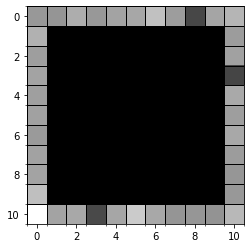

In [15]:
# YOUR CODE GOES HERE 

import matplotlib.pyplot as plt

# for better visualization, make the maximum probability 255
maxProb = max(probs)
normProb = np.divide(probs,maxProb)
normProb = np.multiply(normProb,255)

board = np.zeros((11,11))

bottomRow = normProb[0:11]
bottomRow = np.flip(bottomRow)
board[-1,:] = bottomRow

leftCol = normProb[10:21]
leftCol = np.flip(leftCol)
board[:,0] = leftCol

topRow = normProb[20:31]
topRow = np.flip(topRow)
board[0,:] = topRow

rightCol = normProb[30:]
rightCol = np.flip(rightCol)
board[0:10,-1] = rightCol

plt.imshow(board, cmap="gray")

ax = plt.gca();  # https://stackoverflow.com/questions/38973868/adjusting-gridlines-and-ticks-in-matplotlib-imshow
ax.set_xticks(np.arange(-.5, 11, 1), minor=True);
ax.set_yticks(np.arange(-.5, 11, 1), minor=True);
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

print("This is a standard view of the board. GO is the bottom right square, jail is the bottom left, etc.\n")
print("White: probability=0\nBlack: probability=1")

# QUESTION 1F (ADVANCED) (CSC421 - 0 points, CSC581C - 2 points)

Implement code for handling the money aspect of monopoly and extend your simulation to handle multi-player playing by creating a very simple buying/selling AI for example randomly selecting one or the other action. 
You shoud be able to step through a fully simulated Game of Monopoly and see how everything is working. You can ignore building and assume that when a player lands in a property square they can purchase it at a predefined price and after they purchase it anyone who lands on that square pays a fixed fee. Also no need to simulate getting properties of the same color. 

Of course if you feel ambitious and want to do a full simulation of the actual game that's perfectly fine and 
you will not be penalized for the extra features. 



In [ ]:
# YOUR CODE GOES HERE 